## [Practice 4] Road Sign Detection
* 0. 실습 환경 설정
* 1. 데이터 준비하기
    * 1-1. Pascal VOC Format to YOLO Format
    * 1-2. 데이터 전처리하기
    * 1-3. Config file 만들기
* 2. Training
* 3. Testing
* 4. Inference
* 5. TensorRT 변환
    * 5-1. Export
    * 5-2. 결과 비교하기

### 0. 실습 환경 설정
* 가상환경명 : yolov8
* Python 버전 : python 3.8
* 설치 목록
    * !pip install ultralytics
    * !pip install opencv-python
    * !pip install matplotlib

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.11.4 torch-2.1.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 121.4/228.3 GB disk)


### 1. 데이터 준비하기
### 1-1. Pascal VOC Format to YOLO Format

* TODO : 데이터셋 다운로드 [링크](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection)
* TODO : `road_sign_root`에 위 데이터셋 담겨있는 폴더 경로 넣어주기

In [ ]:
import xml.etree.ElementTree as ET
import glob
import os
import json
from tqdm import tqdm

In [18]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]

In [19]:
road_sign_root = 
annot_path = os.path.join(road_sign_root,"annotations")
img_path = os.path.join(road_sign_root,"images")
label_path = os.path.join(road_sign_root,"labels")

if not os.path.exists(label_path):
    os.makedirs(label_path)

In [20]:
classes = []

files = glob.glob(os.path.join(annot_path, '*.xml'))
for fil in tqdm(files):

    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]

    result = []

    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    for obj in root.findall('object'):
        label = obj.find("name").text
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")
    if result:
        with open(os.path.join(label_path, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))

100%|██████████| 877/877 [00:03<00:00, 271.98it/s]


### 1-2. 데이터 전처리하기

* TODO : 경로이동 (데이터셋 폴더의 상위폴더로 이동)
* TODO : `road_sign_path` 에  데이터셋 폴더 넣어주기

In [ ]:
cd

In [41]:
import os
import random
from shutil import copyfile, rmtree

road_sign_path = 
label_ = '.txt'
img_ = '.png'

# 저장 경로 만들기
folder_list = ['road_sign_detection/train', 'road_sign_detection/val', 'road_sign_detection/train/images', \
                'road_sign_detection/train/labels', 'road_sign_detection/val/images', 'road_sign_detection/val/labels']
for folder in folder_list:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [42]:
file_list = os.listdir(os.path.join(road_sign_path, 'images'))

random.shuffle(file_list)

test_ratio = 0.1
test_list = file_list[:int(len(file_list)*test_ratio)]
train_list = file_list[int(len(file_list)*test_ratio):]

print(f"train의 개수 : {len(train_list)}, test의 개수 : {len(test_list)}")

for i in test_list:
  f_name = os.path.splitext(i)[0]
  copyfile(os.path.join(road_sign_path, 'images', (f_name+img_)), os.path.join(road_sign_path, 'val/images', (f_name+img_)))
  copyfile(os.path.join(road_sign_path, 'labels', (f_name+label_)), os.path.join(road_sign_path, 'val/labels', (f_name+label_)))
for i in train_list:
  f_name = os.path.splitext(i)[0]
  copyfile(os.path.join(road_sign_path, 'images', (f_name+img_)), os.path.join(road_sign_path, 'train/images', (f_name+img_)))
  copyfile(os.path.join(road_sign_path, 'labels', (f_name+label_)), os.path.join(road_sign_path, 'train/labels', (f_name+label_)))

train의 개수 : 790, test의 개수 : 87


### 1-3. Config file 만들기

* TODO : project_road_sign_detection 폴더 만들기
* TODO : 위치 변경 (project_road_sign_detection 폴더로)
* TODO : data['train'], data['val'], data['test'] 입력해주기
    * ${road_sign_detection_dataset root}/train'
    * ${road_sign_detection_dataset root}/val'
    * ${road_sign_detection_dataset root}/val'

In [ ]:
cd

In [15]:
import yaml
data =dict()

data['train'] = 
data['val'] = 
data['test'] = 

data['nc'] = 4
data['names'] =['Trafic_light','Speedlimit', 'Crosswalk','Stop']

with open('road_sign.yaml', 'w') as f:
	yaml.dump(data, f)

### 2. Training

* TODO : 위치 변경 (project_road_sign_detection 폴더로)

In [ ]:
cd

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8s.yaml')
results = model.train(data ='road_sign.yaml', epochs = 100, batch=32,device = 0  , patience=30, name='road_sign_s')

### 3. Testing (Validation)

* TODO : 위치 변경 (project_road_sign_detection 폴더로)
* TODO : 학습한 가중치 위치 `model_path`에 넣어주기

In [ ]:
cd

In [ ]:
from ultralytics import YOLO

# Load a model
model_path = 
model = YOLO(model_path)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

print("map50-95", metrics.box.map)
print("map50", metrics.box.map50)

### 4. Inference

* TODO : 위치 변경 (project_road_sign_detection 폴더로)
* TODO : 학습한 가중치 위치 `model_path`에 넣어주기
* TODO : `project_road_sign_detection/test` 테스트할 이미지들 넣어주기

In [ ]:
cd

In [7]:
from ultralytics import YOLO
import cv2
import os
from ultralytics.yolo.utils.plotting import Annotator
import matplotlib.pyplot as plt
import numpy as np

model_path = 
model = YOLO(model_path)

root_folder = 'test'
result_folder = 'result'
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

test_img_list = os.listdir(root_folder)

device = 'cpu'
color_dict = [(0, 255, 0),(255, 255, 0),(0, 0, 255), (255, 0,0)]
color_dict_2 = [(0, 0, 0),(0, 0, 0),(255, 255, 255), (255, 255,255)]

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")




0: 448x640 1 Trafic_light, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


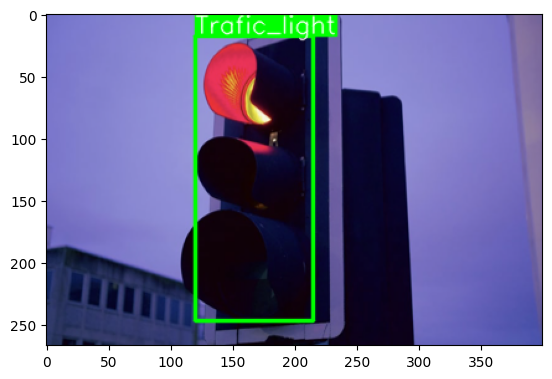

In [9]:
test_img = cv2.imread(os.path.join(root_folder, test_img_list[1]))
img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
results = model(test_img)
for result in results:
    annotator = Annotator(img_src)
    boxes = result.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        cls = box.cls
        annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
img_src = annotator.result()
plt.imshow(img_src)
plt.show()

In [10]:
for idx , file in enumerate(test_img_list):
    test_img = cv2.imread(os.path.join(root_folder, file))
    img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    results = model(test_img)

    for result in results:
        annotator = Annotator(img_src)
        boxes = result.boxes
        for box in boxes:
            b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
            cls = box.cls
            annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)],color_dict_2[int(cls)])
    img_src = annotator.result()
    img_src = cv2.resize(img_src, (400,400))
    cv2.imwrite(os.path.join(result_folder, file), cv2.cvtColor(img_src, cv2.COLOR_RGB2BGR)) 


0: 480x640 1 Speedlimit, 39.9ms
Speed: 6.0ms preprocess, 39.9ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)



0: 448x640 1 Trafic_light, 43.8ms
Speed: 3.0ms preprocess, 43.8ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 Speedlimit, 26.9ms
Speed: 3.0ms preprocess, 26.9ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 Crosswalk, 33.9ms
Speed: 4.0ms preprocess, 33.9ms inference, 9.0ms postprocess per image at shape (1, 3, 512, 640)

0: 448x640 1 Crosswalk, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 416x640 1 Crosswalk, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)

0: 640x448 1 Trafic_light, 19.0ms
Speed: 4.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)

0: 640x480 1 Speedlimit, 1 Stop, 15.9ms
Speed: 4.0ms preprocess, 15.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 2 Crosswalks, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 4.0ms

### 5. TensorRT 변환
### 5-1. Export

* TODO : 위치 변경 (project_road_sign_detection 폴더로)
* TODO : 학습한 가중치 위치 `model_path`에 넣어주기

In [ ]:
cd

In [47]:
from ultralytics import YOLO

* TODO : engine 생성 후에 `best_fp32.engine`로 변경하기

In [ ]:
model_path = 
model = YOLO(model_path)
model.export(format='engine', device=0, half=False)

* TODO : engine 생성 후에 `best_fp16.engine`로 변경하기

In [ ]:
model_path = 
model = YOLO(model_path)
model.export(format='engine', device=0, half=True)

### 5-2. 결과 비교하기

* TODO : 학습한 가중치 위치 `model_path`에 넣어주기
* TODO : fp16 engine경로 `model_fp16_path`에 넣어주기
* TODO : fp32 engine경로 `model_fp32_path`에 넣어주기

In [16]:
from ultralytics import YOLO
import cv2
import os

root_folder = 'test'
test_img_list = os.listdir(root_folder)

test_img = cv2.imread(os.path.join(root_folder, test_img_list[1]))
img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [48]:
# torch
model_path = 
model = YOLO(model_path)
results = model.val(data="road_sign.yaml", batch=1, imgsz=640, plots=False, device=0, half=False, verbose=False)
metric, speed = results.results_dict['metrics/mAP50-95(B)'], results.speed['inference']
print(metric, speed)

Ultralytics YOLOv8.0.157  Python-3.8.17 torch-1.7.1+cu110 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)


YOLOv8s summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning C:\Users\minso\Documents\lecture\dataset\road_sign_detection\val\labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:02<00:00, 31.60it/s]
                   all         87        133      0.964      0.962      0.985      0.863
Speed: 0.9ms preprocess, 14.3ms inference, 0.0ms loss, 1.8ms postprocess per image


0.8634009304410771 14.346914729852786


In [ ]:
#float 16
model_fp16_path = 
model = YOLO(model_fp16_path)
results = model.val(data="road_sign.yaml", batch=1, imgsz=640, plots=False, device=0, half=True, verbose=False)
metric, speed = results.results_dict['metrics/mAP50-95(B)'], results.speed['inference']
print(metric, speed)

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Loading runs/detect/road_sign_s/weights/best.engine for TensorRT inference...
val: Scanning /content/drive/MyDrive/0.dataset/road_sign/val/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:02<00:00, 38.00it/s]
                   all         87        112      0.919      0.928      0.936      0.784
Speed: 0.4ms preprocess, 5.6ms inference, 0.0ms loss, 1.4ms postprocess per image


0.7840162273102067 5.6130803864577725


In [ ]:
#float 32
model_fp32_path = 
model = YOLO(model_fp16_path)
results = model.val(data="road_sign.yaml", batch=1, imgsz=640, plots=False, device=0, half=False, verbose=False)
metric, speed = results.results_dict['metrics/mAP50-95(B)'], results.speed['inference']
print(metric, speed)

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Loading runs/detect/road_sign_s/weights/best.engine for TensorRT inference...
100%|██████████| 755k/755k [00:00<00:00, 94.1MB/s]
val: Scanning /content/drive/MyDrive/0.dataset/road_sign/val/labels... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [02:18<00:00,  1.60s/it]
val: New cache created: /content/drive/MyDrive/0.dataset/road_sign/val/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:05<00:00, 17.34it/s]
                   all         87        112      0.919      0.927      0.936      0.788
Speed: 0.4ms preprocess, 13.1ms inference, 0.0ms loss, 1.9ms postprocess per image


0.7881495053534824 13.124085020744937
